### Import relevant libraries 

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd


### Load the data

In [2]:
npz = np.load('housing_training_data.npz', allow_pickle=True)
train_inputs,train_targets = npz['inputs'].astype(float), npz['targets'].astype(float)

npz = np.load('housing_test_data.npz', allow_pickle=True)
test_inputs, test_targets = npz['inputs'].astype(float), npz['targets'].astype(float)

### Model

In [3]:
def base_model(train_inputs,train_targets,loss_function,epochs):
    NN_model = tf.keras.Sequential([
                                    tf.keras.layers.Dense(100,activation="relu"),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(100,activation="relu"),                                    
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(1,activation = "linear"),
                                ])

    NN_model.compile(optimizer = 'adam', 
                     loss = loss_function, 
                     metrics = ['mean_squared_error'])
    
    NN_model.fit(train_inputs, 
                train_targets,
                epochs= epochs,
                validation_split=0.2,
                verbose = 2)
    return NN_model

In [4]:
model = base_model(
                    train_inputs,
                    train_targets,
                    loss_function='mean_squared_error',
                    epochs = 1000)




Epoch 1/1000
364/364 - 2s - loss: 0.4541 - mean_squared_error: 0.4541 - val_loss: 0.3801 - val_mean_squared_error: 0.3801 - 2s/epoch - 6ms/step
Epoch 2/1000
364/364 - 1s - loss: 0.3686 - mean_squared_error: 0.3686 - val_loss: 0.3382 - val_mean_squared_error: 0.3382 - 719ms/epoch - 2ms/step
Epoch 3/1000
364/364 - 1s - loss: 0.3465 - mean_squared_error: 0.3465 - val_loss: 0.3277 - val_mean_squared_error: 0.3277 - 727ms/epoch - 2ms/step
Epoch 4/1000
364/364 - 1s - loss: 0.3352 - mean_squared_error: 0.3352 - val_loss: 0.3207 - val_mean_squared_error: 0.3207 - 729ms/epoch - 2ms/step
Epoch 5/1000
364/364 - 1s - loss: 0.3235 - mean_squared_error: 0.3235 - val_loss: 0.3109 - val_mean_squared_error: 0.3109 - 804ms/epoch - 2ms/step
Epoch 6/1000
364/364 - 1s - loss: 0.3127 - mean_squared_error: 0.3127 - val_loss: 0.3072 - val_mean_squared_error: 0.3072 - 738ms/epoch - 2ms/step
Epoch 7/1000
364/364 - 1s - loss: 0.3065 - mean_squared_error: 0.3065 - val_loss: 0.2963 - val_mean_squared_error: 0.2963

### After Training
1. Calculate predictions on test test_inputs
2. Check r2 score of our predictions'
3. Plot actual values vs predicted values graph
4. Conclusion

In [5]:
prediction = model.predict(test_inputs)
prediction

152/152 [==============================] - 0s 1ms/step


array([[ 0.04181066],
       [ 2.0870287 ],
       [-0.8586255 ],
       ...,
       [ 1.084697  ],
       [-0.43546933],
       [-0.2274664 ]], dtype=float32)

In [6]:
from sklearn.metrics import r2_score
r2_score(test_targets, prediction)

0.7840903715304688

We got an r2_score of nearly 73 %

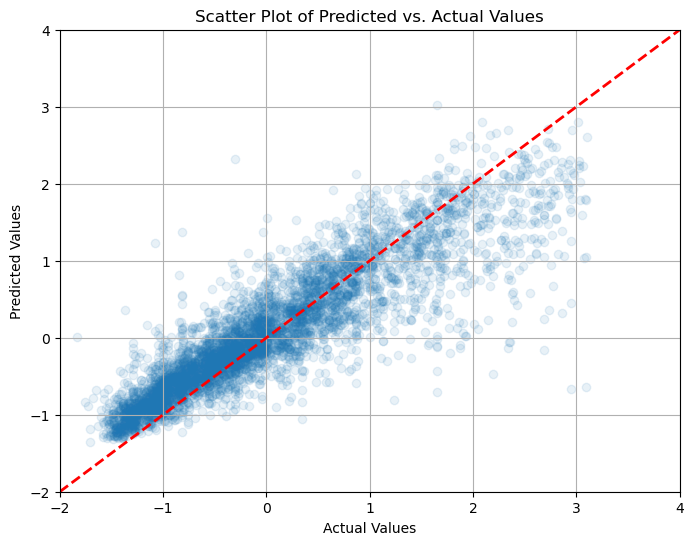

In [11]:
import matplotlib.pyplot as plt

min_range = -2
max_range = 4
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(test_targets, prediction, alpha=0.1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.xlim(min_range, max_range)
plt.ylim(min_range, max_range)
plt.plot([min_range, max_range], [min_range, max_range], color='red', linestyle='--', linewidth=2)
plt.grid(True)

# Show the plot
plt.show()
#In this code, we filter the values to be within the specified range (10,000 to 500,000) and then create a scatter plot of predicted vs. actual values. The red dashed line represents the line where predicted values would be equal to actual values. This plot allows you to visually assess how well your model's predictions align with the actual values within the specified range.







### Conclusion
1. Most of the points are near the red line which indicates that our are prediction are nearer to the actual values
2. Our model doesn't quite the values for values greater than 3,00,000 as the points shift to the downward side of the line.